(128, 128, 3)


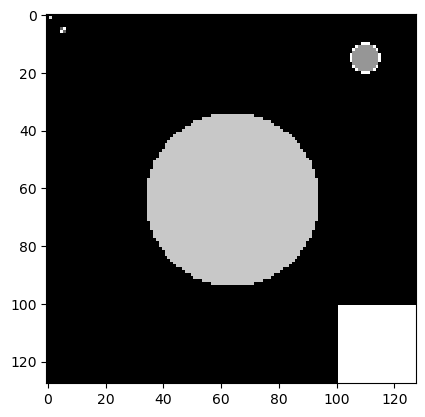

In [250]:
import numpy as np
from matplotlib import pyplot as plt

# tworzymy tablice o wymiarach 128x128x3 (3 kanaly to RGB)
# uzupelnioną zerami = kolor czarny
data = np.zeros((128, 128, 3), dtype=np.uint8)


# chcemy zeby obrazek byl czarnobialy,
# wiec wszystkie trzy kanaly rgb uzupelniamy tymi samymi liczbami
# napiszmy do tego funkcje
def draw(img, x, y, color):
    img[x, y] = [color, color, color]


# zamalowanie 4 pikseli w lewym górnym rogu
draw(data, 5, 5, 100)
draw(data, 6, 6, 100)
draw(data, 5, 6, 255)
draw(data, 6, 5, 255)

draw(data, 1, 1, 222)

# rysowanie kilku figur na obrazku
for i in range(128):
    for j in range(128):
        if (i-64)**2 + (j-64)**2 < 900:
            draw(data, i, j, 200)
        elif i > 100 and j > 100:
            draw(data, i, j, 255)
        elif (i-15)**2 + (j-110)**2 < 25:
            draw(data, i, j, 150)
        elif (i-15)**2 + (j-110)**2 == 25 or (i-15)**2 + (j-110)**2 == 26:
            draw(data, i, j, 255)

# konwersja macierzy na obrazek i wyświetlenie
print(data.shape)
plt.imshow(data, interpolation='nearest')
plt.show()


### We define out kernel (this one is a vertical kernel)

In [178]:
kernel = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])

### Function to multiply minors with the kernel

In [253]:
def multiply_minor(minor,kernel):
    result = np.uint8(0)
    for y in range(3):
        for x in range(3):
            result += minor[y][x] * kernel[y][x]
    return result

In [254]:
def minorize(matrix):
    minors = []
    for i in range(matrix.shape[0] - 2):
        for j in range(matrix.shape[1] - 2):
            submatrix = matrix[i:i+3, j:j+3]
            minors.append(submatrix)
    return minors

In [255]:
result = [[],[],[]]
for z in range(3):
    result_layer = []
    matrix = data[:,:,z]
    minors = []
    minors = minorize(matrix)
    for minor in minors:
        result_layer.append(multiply_minor(minor,kernel))
    result_layer = np.array(result_layer)
    chunks = result_layer.reshape(-1,126)
    result[z].append(chunks)

In [256]:
result = np.transpose(np.squeeze(result),(1,2,0))

### Show the result as an image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


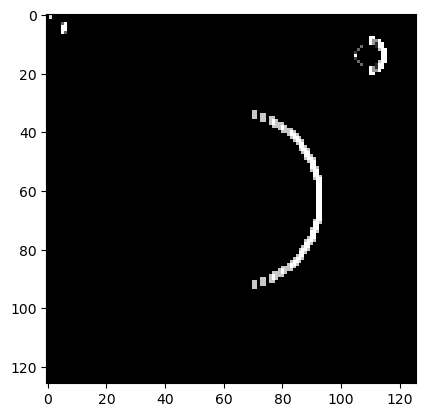

In [257]:
plt.imshow(result, interpolation='nearest')
plt.show()